# Pertemuan 3

In [1]:
import cv2
import numpy as np

## 1. Image Color Conversion

- Diperkenalkan method `cv2.cvtColor()` untuk color conversion pada OpenCV

- Berikut adalah parameter convert color yang dapat digunakan :
    - convert BGR <--> RGB \
    `cv2.COLOR_BGR2RGB` \
    `cv2.COLOR_RGB2BGR`

    - convert BGR <--> HSV \
    `cv2.COLOR_BGR2HSV` \
    `cv2.COLOR_HSV2RGB`

    - convert BGR <--> BGRA \
    `cv2.COLOR_BGR2BGRA` \
    `cv2.COLOR_BGRA2BGR`

    - convert RGB <--> RGBA \
    `cv2.COLOR_RGB2BGRA` \
    `cv2.COLOR_RGBA2BGR`

    - convert BGR <--> GRAY \
    `cv2.COLOR_BGR2GRAY` \
    `cv2.COLOR_GRAY2RGB`

#### 1.1 Convert Image

In [2]:
# convert BGR to Gray
img = cv2.imread("lena.jpg")

img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

cv2.imshow('Original Image', img)
cv2.imshow('Grayscale Image', img_gray)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [3]:
# convert BGR to RGB
img = cv2.imread("lena.jpg")

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

cv2.imshow('Original Image', img)
cv2.imshow('RGB Image', img_rgb)
cv2.waitKey(0)
cv2.destroyAllWindows()

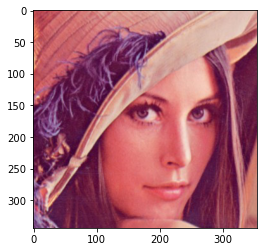

In [4]:
import matplotlib.pyplot as plt

img = cv2.imread("lena.jpg")

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)


In [5]:
# convert BGR to BGRA
img = cv2.imread("lena.jpg")

img_bgra = cv2.cvtColor(img, cv2.COLOR_BGR2BGRA)

cv2.imshow('Original Image', img)
cv2.imshow('BGRA Image', img_bgra)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [6]:
img.shape

(344, 354, 3)

In [7]:
img_bgra.shape

(344, 354, 4)

In [11]:
img_bgra[0, 0] # B, G, R, A

array([ 82,  73, 183, 255], dtype=uint8)

- `A` pada `BGRA` merupakan transparency level (0 - 255)

In [16]:
# set layer `A` menjadi 127 ( transparency 50%) 127 ~ 1/2 (255)
img_bgra[:,:, 3] = 70

In [17]:
img_bgra[0, 0] # B, G, R, A

array([ 82,  73, 183,  70], dtype=uint8)

In [14]:
cv2.imshow('BGRA Image Edit', img_bgra)
cv2.imshow('Original Image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

- Saat di preview tidak terlihat perbedaanya,
- Save untuk melihat hasil tranparency
- Hanya bisa dilihat hasil tranparency nya dalam format (.png)

In [18]:
cv2.imwrite("lena-transparency.png", img_bgra)

True

In [19]:
cv2.imwrite("lena-transparency.jpg", img_bgra)

True

#### 1.2 Convert Video

In [21]:
cap = cv2.VideoCapture('video.mp4')

while cap.isOpened():
    ret, frame = cap.read()
    
    if ret:
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        
        cv2.imshow('grayscale video', gray)
        
        if cv2.waitKey(25) == ord('q'):
            break
    else :
        break
cv2.destroyAllWindows()

- result  :

<img src="resource/video-grayscale.png" style="width:700"></img>

___

## 2. Drawing Tool

- Draw a **line** by using the OpenCV function `cv2.line()`
- Draw an **ellipse** by using the OpenCV function `cv2.ellipse()`
- Draw a **rectangle** by using the OpenCV function `cv2.rectangle()`
- Draw a **circle** by using the OpenCV function `cv2.circle()`
- Draw a **filled polygon** by using the OpenCV function `cv2.fillPoly()`
- Write a **text** by using the OpenCV function `cv2.putText()`

#### 2.1 Draw Line (`cv2.line()`)

- Menggunakan method `cv2.line(img, (x0,y0), (xt,yt), (B, G, R), thickness, line_type)` 
- untuk :
    - `img` : input image
    - `(x0, y0)` : start point (tuple)
    - `(xt, yt)` : end point (tuple)
    - `(B, G, R)` : line color (tuple)
    - `thickness` : line thickness 
    - `line_type` :
        - `cv2.FILLED` : filled line
        - `cv2.LINE_4` : 4-connected line
        - `cv2.LINE_8` : 8-connected line
        - `cv2.LINE_AA` : antialiased line
        
<img src="resource/draw-line.png" style="width:700"></img>

- Simple draw line

In [23]:
background = np.zeros((400, 400, 3)).astype(np.uint8)

#  horizontal line (red), y0 = yt
cv2.line(background,  # input image matrix
         (100, 350),  # (x1, y1)
         (300, 350),  # (x2, y2)    
         (50,0,255),  # (B, G, R)   
         3)           # thickness 

cv2.imshow("Draw Line", background)
cv2.waitKey(0)
cv2.destroyAllWindows()

- Draw multiple line

In [24]:
background = np.zeros((400, 400, 3)).astype(np.uint8)

#  horizontal line (red), y0 = yt
cv2.line(background,
         (100, 350),                
         (300, 350),               
         (50,0,255),              
         3,
         cv2.FILLED)                      

# vertical line (green), x0 = xt
cv2.line(background,
         (50, 100),                
         (50, 300),              
         (25,255,0),               
         20,
         cv2.LINE_8)  

# garis miring (pink)
cv2.line(background,
         (250, 300),                   
         (230 ,100),              
         (255,0,255),             
         5,
         cv2.LINE_4)  

# garis miring (tosca)
cv2.line(background,
         (300, 300),                
         (280, 100),              
         (100,127,0),               
         5,
         cv2.LINE_AA) 

cv2.imshow("Draw Line", background)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### 2.2 Draw Rectangle (`cv2.rectangle()`)


- Menggunakan method `cv2.rectangle(img, (x0,y0), (xt,yt), (B, G, R), thickness, line_type)` 
- untuk :
    - `img` : input image
    - `(x0, y0)` : top-left-corner rectangle point (tuple)
    - `(xt, yt)` : bottom-right-corner rectangle point (tuple)
    - `(B, G, R)` : rectangle color (tuple)
    - `thickness` : rectangle thickness (if negative, color will be user as fillcolor)
    - `line_type` :
        - `cv2.FILLED` : filled line
        - `cv2.LINE_4` : 4-connected line
        - `cv2.LINE_8` : 8-connected line
        - `cv2.LINE_AA` : antialiased line
        
<img src="resource/draw-box.png" style="width:700"></img>

- draw rectangle

In [26]:
background = np.zeros((400, 400, 3)).astype(np.uint8)

cv2.rectangle(background, # input image
              (15,25),    # (x1, y1)
              (200,150),  # (x2, y2)
              (0,0,255),  # (B, G, R)
              5)          # thickness

cv2.imshow("Draw Rectangle", background)

cv2.waitKey(0)
cv2.destroyAllWindows()

- draw filled rectangle

In [27]:
background = np.zeros((400, 400, 3)).astype(np.uint8)

# outline color
cv2.rectangle(background,
              (15,25),    
              (200,150),  
              (0,0,255), 
              5)          

# fill color
cv2.rectangle(background,
              (210,50),   
              (270,270),  
              (0,200,255),
              -1,
               cv2.LINE_AA)           

cv2.imshow("Draw Rectangle", background)

cv2.waitKey(0)
cv2.destroyAllWindows()

#### 2.3 Draw Circle (`cv2.circle()`)


- Menggunakan method `cv2.circle(img, (x,y), radius, (B, G, R), thickness, line_type)` 
- untuk :
    - `img` : input image
    - `(x, y)` : circle center point (tuple)
    - `radius` : circle radius (in pixel)
    - `(B, G, R)` : circle color (tuple)
    - `thickness` : circle thickness  (if negative, color will be user as fillcolor)
    - `line_type` :
        - `cv2.FILLED` : filled line
        - `cv2.LINE_4` : 4-connected line
        - `cv2.LINE_8` : 8-connected line
        - `cv2.LINE_AA` : antialiased line
        
<img src="resource/draw-circel.png" style="width:700"></img>

- draw circle

In [29]:
img = cv2.imread("lena.jpg")

# circle outline
cv2.circle(img,          # image matrix
           (150, 100),     # (x, y)
           55,           # radius
           (0,255,150),  # (B, G, R)
           2)            # thickness                
     
    
cv2.imshow("Draw Circle", img)

cv2.waitKey(0)
cv2.destroyAllWindows()

- draw filled circle

In [32]:
img = cv2.imread("lena.jpg")

# circle outline
cv2.circle(img,
           (65, 65),         
           55,               
           (0,255,150),      
           2,
           cv2.LINE_AA)                

# circle fill
cv2.circle(img,
           (65, 250),         
           55,                
           (0,50,250),       
           -1,
           cv2.LINE_AA)                
                             
    
cv2.imshow("Draw Circle", img)

cv2.waitKey(0)
cv2.destroyAllWindows()

#### 2.4 Write Text (`cv2.putText()`)


- Menggunakan method `cv2.putText(img, text, (x,y), font_type, font_scale, (B, G, R), thickness, line_type)` 
- untuk :
    - `img` : input image
    - `text` : string to write in image 
    - `(x, y)` : start-left position of text (tuple)
    - `font_type` : 
        - `cv2.FONT_HERSHEY_SIMPLEX` : size sans-serif font
        - `cv2.FONT_HERSHEY_PLAIN` : small size sans-serif font
        - `cv2.FONT_HERSHEY_DUPLEX` : normal size sans-serif font (more complex than FONT_HERSHEY_SIMPLEX)
        - `cv2.FONT_HERSHEY_COMPLEX` : normal size serif font
        - `cv2.FONT_HERSHEY_TRIPLEX` : normal size serif font (more complex than FONT_HERSHEY_COMPLEX)
        - `cv2.FONT_HERSHEY_COMPLEX_SMALL` : smaller version of FONT_HERSHEY_COMPLEX
        - `cv2.FONT_HERSHEY_SCRIPT_SIMPLEX` : hand-writing style font
        - `cv2.FONT_HERSHEY_SCRIPT_COMPLEX` : more complex variant of FONT_HERSHEY_SCRIPT_SIMPLEX
        - `cv2.FONT_ITALIC` : flag for italic font
    - `(B, G, R)` : circle color (tuple)
    - `thickness` : circle thickness  (if negative, color will be user as fillcolor)
    - `line_type` :
        - `cv2.FILLED` : filled line
        - `cv2.LINE_4` : 4-connected line
        - `cv2.LINE_8` : 8-connected line
        - `cv2.LINE_AA` : antialiased line
        
<img src="resource/draw-text.png" style="width:700"></img>

- draw text

In [40]:
background = np.zeros((200, 400, 3)).astype(np.uint8)

cv2.putText(background, 
            "Hello world", 
            (50, 50),                   
            cv2.FONT_HERSHEY_SIMPLEX,     
            0.7,                          
            (0, 255, 127),                
            1,
            cv2.LINE_AA) 

cv2.imshow("Draw Text", background)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [46]:
img = cv2.imread("lena.jpg")
cv2.putText(img, 
            "Hello world", 
            (150, 250),                   
            cv2.FONT_HERSHEY_TRIPLEX,     
            1.9,                          
            (255, 127, 0),                
            1,
            cv2.LINE_AA) 

cv2.putText(img, 
            "Hello world 2", 
            (50, 50),                   
            cv2.FONT_HERSHEY_SIMPLEX,     
            1.9,                          
            (0, 255, 127),                
            1,
            cv2.LINE_AA) 

cv2.imshow("Draw Text on Image", img)

cv2.waitKey(0)
cv2.destroyAllWindows()

#### 2.5 Draw & Mouse Event Click

- **Draw line** menggunakan mouse
<img src="resource/drawline-click.gif" style="width:500"></img>

In [47]:
x0, y0, xt, yt = 0, 0, 0, 0

title_window = "Draw Line"
is_draw = False
frame = np.ones((400, 400, 3)).astype(np.uint8)*255
 
def draw_line(x0=0, y0=0, xt=0, yt=0):
    background = frame.copy()
    cv2.line(background, (x0, y0), (xt, yt), (255,0,255), 3, cv2.LINE_AA)
    cv2.imshow(title_window, background)
    
def read_line(event,x,y,flags,param):
    
    global x0, y0, xt, yt, is_draw
    
    if event == cv2.EVENT_LBUTTONDOWN:
        x0, y0, xt, yt = x, y, x, y
        is_draw = True

    elif event == cv2.EVENT_MOUSEMOVE:
        xt, yt = x, y

    elif event == cv2.EVENT_LBUTTONUP:
        xt, yt = x, y
        is_draw = False
        
    if is_draw :
        draw_line(x0, y0, xt, yt)
    
cv2.namedWindow(title_window) 
cv2.setMouseCallback(title_window, read_line) 

draw_line()
cv2.waitKey(0)
cv2.destroyAllWindows()

#### Task

- **Draw Rectangle** menggunakan mouse event click

In [ ]:
#
#
# function draw rectangle
#
#

def draw_rectangle(x0=0, y0=0, xt=0, yt=0):
    background = frame.copy()
    cv2.rectangle(background, (x0, y0), (xt, yt), (255,0,255), 3, cv2.LINE_AA)
    cv2.imshow(title_window, background)
    

In [49]:
x0, y0, xt, yt = 0, 0, 0, 0

title_window = "Draw Rectangle"
is_draw = False
frame = np.ones((400, 400, 3)).astype(np.uint8)*255
 
def draw_rectangle(x0=0, y0=0, xt=0, yt=0):
    background = frame.copy()
    cv2.rectangle(background, (x0, y0), (xt, yt), (255,0,255), 3, cv2.LINE_AA)
    cv2.imshow(title_window, background)
    
def read_rectangle(event,x,y,flags,param):
    
    global x0, y0, xt, yt, is_draw
    
    if event == cv2.EVENT_LBUTTONDOWN:
        x0, y0, xt, yt = x, y, x, y
        is_draw = True

    elif event == cv2.EVENT_MOUSEMOVE:
        xt, yt = x, y

    elif event == cv2.EVENT_LBUTTONUP:
        xt, yt = x, y
        is_draw = False
        
    if is_draw :
        draw_rectangle(x0, y0, xt, yt)
    
cv2.namedWindow(title_window) 
cv2.setMouseCallback(title_window, read_rectangle) 

draw_rectangle()
cv2.waitKey(0)
cv2.destroyAllWindows()

- **draw circle** dan mouse event click

hitung radius circle dengan menggunakan, 

$r = \sqrt{(x - x0)^{2} + (y - y0)^{2}} $ 

untuk $x0$ dan $y0$ merupakan pusat lingkaran.

<img src="resource/draw-circle-click.gif" style="width:500"></img>

In [50]:
import math
x0, y0, r = 0, 0, 0

title_window = "Draw Circle"
is_draw = False
frame = np.ones((400, 400, 3)).astype(np.uint8)*255
 
def draw_circle(x0, y0, r):
    background = frame.copy()
    cv2.circle(background, (x0, y0), r, (0,255,150), 2, cv2.LINE_AA)
    cv2.imshow(title_window, background)
    
    
def read_circle(event,x,y,flags,param):
    
    global x0, y0, r, is_draw
    
    if event == cv2.EVENT_LBUTTONDOWN:
        x0, y0, r = x, y, 0
        is_draw = True

    elif event == cv2.EVENT_MOUSEMOVE:
        r = int(math.sqrt((x - x0)**2 + (y - y0)**2))

    elif event == cv2.EVENT_LBUTTONUP:
        r = int(math.sqrt((x - x0)**2 + (y - y0)**2))
        is_draw = False
        
    if is_draw :
        draw_circle(x0, y0, r)
    
    
cv2.namedWindow(title_window) 
cv2.setMouseCallback(title_window, read_circle) 

draw_circle(x0, y0, r)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### 2.6 Crop & Draw & Mouse Event Click

- Modifikasi crop dengan event click

<img src="resource/draw-crop-click.gif" style="width:500"></img>

In [52]:
x0, y0, xt, yt = 0, 0, 0, 0

title_window = "Draw Rectangle"
is_draw = False
base_img = cv2.imread('lena.jpg')
img = base_img.copy()

def draw_rectangle(x0=0, y0=0, xt=0, yt=0):
    img = base_img.copy()
    cv2.rectangle(img, (x0, y0), (xt, yt), (255,0,255), 3, cv2.LINE_AA)
    cv2.imshow(title_window, img)
    
def crop_image(crop_image):
    img_crop = img[y0:yt, x0:xt]
    cv2.imwrite('image.jpg', img_crop)
    cv2.imshow("croped image", img_crop)
    
def read_rectangle(event,x,y,flags,param):
    
    global x0, y0, xt, yt, is_draw
    
    if event == cv2.EVENT_LBUTTONDOWN:
        x0, y0, xt, yt = x, y, x, y
        is_draw = True

    elif event == cv2.EVENT_MOUSEMOVE:
        xt, yt = x, y

    elif event == cv2.EVENT_LBUTTONUP:
        xt, yt = x, y
        is_draw = False
        crop_image(crop_image)
        
    if is_draw :
        draw_rectangle(x0, y0, xt, yt)
    
cv2.namedWindow(title_window) 
cv2.setMouseCallback(title_window, read_rectangle) 

draw_rectangle()
cv2.waitKey(0)
cv2.destroyAllWindows()

### 2.7 Measure Text size before drawing

- menggunakan method `cv2.getTextSize(text, fontFace, fontScale, thickness))`
- mengembalikan dua variabel : 
    - `size` : dimensi (w, h) text 
    - `baseline` : y coord, relative to most bottom text
    
<img src="resource/text_size.png" style="width:700"></img>

In [55]:
cv2.getTextSize("hello", cv2.FONT_HERSHEY_SIMPLEX, 0.5, 1)

((37, 12), 5)

- **Draw text & Box** menggunakan (x, y) yang sama

<img src="resource/text_n_box.png" style="width:700"></img>

In [56]:
background = np.zeros((200, 400, 3)).astype(np.uint8)

cv2.rectangle(background, # input image
              (50,100),    # (x1, y1)
              (200,150),  # (x2, y2)
              (0,0,255),  # (B, G, R)
              -1)          # thickness

cv2.putText(background, 
            "Hello world", 
            (50, 100),                   
            cv2.FONT_HERSHEY_SIMPLEX,     
            0.9,                          
            (0, 255, 127),                
            1,
            cv2.LINE_AA) 

cv2.imshow("Draw Rectangle", background)
cv2.waitKey(0)
cv2.destroyAllWindows()

- **Draw text & box** menggunakan (x,y) + `cv2.textSize()`

<img src="resource/text_n_box_2.png" style="width:700"></img>

In [57]:
background = np.zeros((200, 400, 3)).astype(np.uint8)

text = "Hello world"
(w, h), baseline = cv2.getTextSize(text, cv2.FONT_HERSHEY_SIMPLEX, 0.9, 1)

cv2.rectangle(background,
              (50,100 - h),  
              (50 + w, 100 + baseline), 
              (0,255,255), 
              -1)        

cv2.putText(background, 
            text, 
            (50, 100),                   
            cv2.FONT_HERSHEY_SIMPLEX,     
            0.9,                          
            (255, 0, 0),                
            1,
            cv2.LINE_AA) 

cv2.imshow("Draw Rectangle", background)
cv2.waitKey(0)
cv2.destroyAllWindows()

- Wrap text & box into **function** `draw_label_box()`

In [58]:
def draw_label_box(img, label, x, y):
    (w, h), baseline = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.9, 1)
    cv2.rectangle(img,
                  (x, y - h),  
                  (x + w, y + baseline), 
                  (255,0,255), 
                  -1)        
    cv2.putText(img, 
                label, 
                (x, y),                   
                cv2.FONT_HERSHEY_SIMPLEX,     
                0.9,                          
                (255, 255, 255),                
                1,
                cv2.LINE_AA) 
    return img

In [61]:
background = cv2.imread('lena.jpg')#np.zeros((400, 400, 3)).astype(np.uint8)

background = draw_label_box(background, "Hello world",10, 100)

cv2.imshow("Draw Rectangle", background)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### 2.8 Bounding Box Object Detetction

- Membuat **box object detetcion**

<img src="resource/object-detection.gif" style="width:700"></img>

- atur **label**
- atur **posisi** (`x0, y0, xt, yt`)
- atur **warna box & text**

- Simple draw box

In [64]:
img = cv2.imread('lena.jpg')

cv2.rectangle(img,
              (50, 50),  
              (300, 300), 
              (255,127,0), 
              2)

cv2.imshow("Draw Rectangle", img)
cv2.waitKey(0)
cv2.destroyAllWindows()


- draw fill box with text

In [63]:
img = cv2.imread('lena.jpg')

(w, h), baseline = cv2.getTextSize("lena.jpg", cv2.FONT_HERSHEY_SIMPLEX, 0.5, 1)
cv2.rectangle(img,
              (50, 50 - h),  
              (50 + w, 50 + baseline), 
              (255,127,0), 
              -1) 
cv2.putText(img, 
            "lena.jpg", 
            (50, 50),                   
            cv2.FONT_HERSHEY_SIMPLEX,     
            0.5,                          
            (255,255,255),                
            1,
            cv2.LINE_AA) 

cv2.imshow("Draw Rectangle", img)
cv2.waitKey(0)
cv2.destroyAllWindows()


- combine together

In [65]:
img = cv2.imread('lena.jpg')

(w, h), baseline = cv2.getTextSize("lena.jpg", cv2.FONT_HERSHEY_SIMPLEX, 0.5, 1)
cv2.rectangle(img,
              (50, 50 + baseline),  
              (300, 300), 
              (255,127,0), 
              2)
cv2.rectangle(img,
              (50, 50 - h),  
              (50 + w, 50 + baseline), 
              (255,127,0), 
              -1) 
cv2.putText(img, 
            "lena.jpg", 
            (50, 50),                   
            cv2.FONT_HERSHEY_SIMPLEX,     
            0.5,                          
            (255,255,255),                
            1,
            cv2.LINE_AA) 

cv2.imshow("Draw Rectangle", img)
cv2.waitKey(0)
cv2.destroyAllWindows()


- wrap into **function**  `draw_ped()`

In [66]:
def draw_ped(img, label, x0, y0, xt, yt, color=(255,127,0), text_color=(255,255,255)):

    (w, h), baseline = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.5, 1)
    cv2.rectangle(img,
                  (x0, y0 + baseline),  
                  (max(xt, x0 + w), yt), 
                  color, 
                  2)
    cv2.rectangle(img,
                  (x0, y0 - h),  
                  (x0 + w, y0 + baseline), 
                  color, 
                  -1)  
    cv2.putText(img, 
                label, 
                (x0, y0),                   
                cv2.FONT_HERSHEY_SIMPLEX,     
                0.5,                          
                text_color,                
                1,
                cv2.LINE_AA) 
    return img

In [67]:
img = cv2.imread('lena.jpg')

img = draw_ped(img, "image : lena.jpg",50, 50, 300, 300)

cv2.imshow("Draw Rectangle", img)
cv2.waitKey(0)
cv2.destroyAllWindows()